<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>

El **cáncer de mama** es una proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Esta enfermedad clonal surge cuando una célula adquiere, a través de mutaciones, la capacidad de dividirse sin control, formando un tumor que puede invadir tejidos vecinos y propagarse a otras partes del cuerpo.

El conjunto de datos `BC.csv` contiene información sobre pacientes con tumores (benignos o malignos) y diversas características del tumor, calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Estas características describen los núcleos celulares en la imagen y permiten diferenciar entre tumores benignos y malignos.

A continuación, cargamos el conjunto de datos:

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

<ipython-input-1-ede4ca97064c>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Con base en la información presentada, responde las siguientes preguntas. Asegúrate de incluir el código necesario para realizar los análisis requeridos y proporciona una breve explicación que describa tus resultados y el proceso que seguiste.




1. Realice un análisis exploratorio del conjunto de datos.

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 1

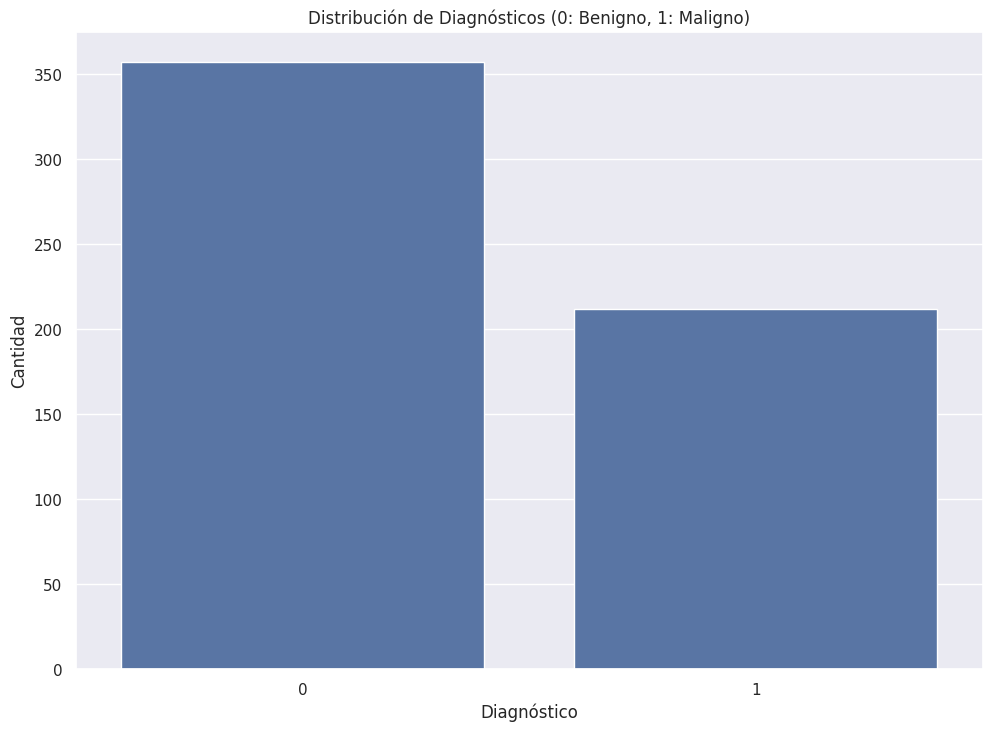

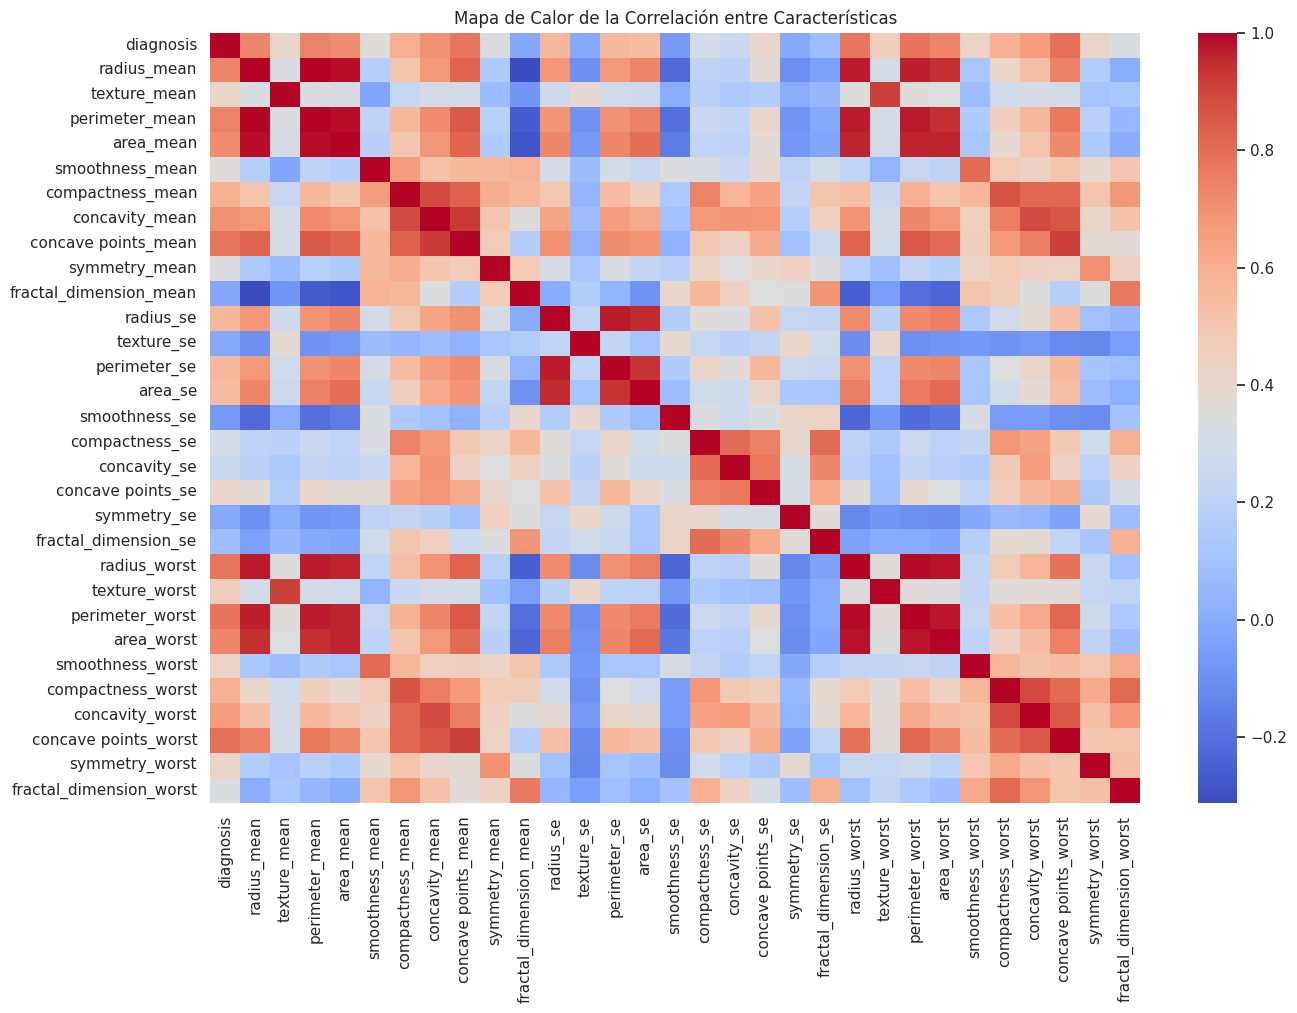


Valores nulos por columna:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [2]:
# Análisis exploratorio del conjunto de datos

# Verificar la información general del DataFrame
print("Información del DataFrame:")
df.info()

# Describir las estadísticas generales del DataFrame
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualizar la distribución de la variable objetivo 'diagnosis'
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnósticos (0: Benigno, 1: Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

# Visualizar el mapa de calor de la correlación entre las características
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación entre Características')
plt.show()

# Ver los valores nulos en el DataFrame
print("\nValores nulos por columna:")
print(df.isnull().sum())


El análisis exploratorio del conjunto de datos muestra que este contiene 569 entradas y 31 columnas, sin valores nulos y con características de tipo numérico. Las estadísticas descriptivas indican que hay una variabilidad notable en características como radius_mean, area_mean y perimeter_mean, las cuales están altamente correlacionadas entre sí y con la variable objetivo diagnosis, lo que sugiere su relevancia para la predicción. El gráfico de distribución de diagnosis revela un desequilibrio con más casos benignos (0) que malignos (1), un aspecto importante al considerar el balance de clases en los modelos. El mapa de calor refuerza la importancia de ciertas características y su posible multicolinealidad

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [3]:
# Importar StandardScaler
from sklearn.preprocessing import StandardScaler

# Separar las características numéricas y la variable objetivo
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Aplicar StandardScaler a las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame escalado
X_scaled_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


3. Realizar un método de reducción de dimensionalidad visto en clases.

Valores únicos en la columna 'diagnosis': [1 0]


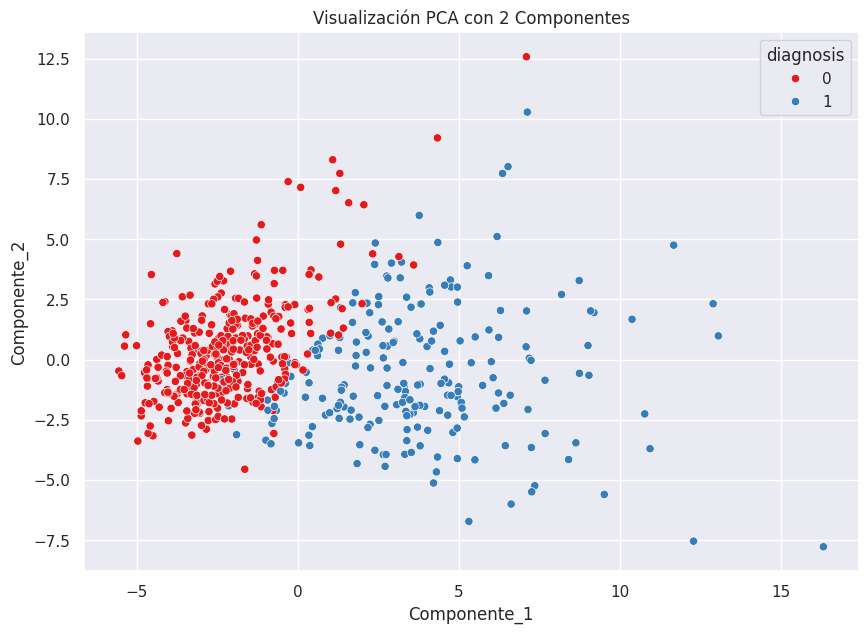

In [4]:
# Importar PCA de scikit-learn
from sklearn.decomposition import PCA

# Aplicar PCA al conjunto de datos normalizado
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Convertir el resultado a un DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Reasignar la variable objetivo correctamente a X_pca_df
X_pca_df['diagnosis'] = y.values

# Verificar que la columna 'diagnosis' tenga valores correctos
print("Valores únicos en la columna 'diagnosis':", X_pca_df['diagnosis'].unique())

# Visualizar los datos reducidos en 2D con un gráfico de dispersión
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Componente_1', y='Componente_2', hue='diagnosis', data=X_pca_df, palette='Set1')
plt.title('Visualización PCA con 2 Componentes')
plt.xlabel('Componente_1')
plt.ylabel('Componente_2')
plt.show()


El gráfico muestra la distribución de los datos de tumores benignos (0) y malignos (1) en el espacio reducido a dos componentes principales mediante PCA. Podemos observar una separación parcial entre ambas clases, lo que indica que las dos primeras componentes capturan cierta información relevante para distinguir entre tumores benignos y malignos. Los tumores malignos tienden a ubicarse hacia la derecha en el gráfico, mientras que los benignos se concentran hacia la izquierda. Este resultado sugiere que el PCA ha logrado extraer patrones significativos en los datos, lo que podría ser útil para mejorar la eficiencia y precisión de un modelo de clasificación.

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [5]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definir los modelos y sus hiperparámetros para optimización
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Entrenar y optimizar cada modelo usando GridSearchCV
results = {}
for name, config in models.items():
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar resultados
    results[name] = {
        'Best Params': grid.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Mostrar resultados
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Mejores Parámetros: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")



Logistic Regression:
Mejores Parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99

Support Vector Classifier:
Mejores Parámetros: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Random Forest:
Mejores Parámetros: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1 Score: 0.96


Los resultados muestran que los tres modelos de clasificación (Regresión Logística, SVM y Random Forest) tienen un rendimiento alto y comparable en términos de accuracy, precision, recall y F1 score. La Regresión Logística destaca con una accuracy del 99% y un F1 score de 0.99, indicando un equilibrio sobresaliente entre precision y recall, con un recall del 98%, lo que sugiere que es excelente para detectar casos positivos. El SVM también mostró un rendimiento sólido con una accuracy del 98% y un F1 score de 0.97, destacando por su robustez en la separación de clases. El Random Forest, aunque ligeramente por debajo de los otros modelos con una accuracy del 97% y un F1 score de 0.96, sigue siendo muy eficiente, con el beneficio adicional de manejar características no lineales y ofrecer interpretabilidad mediante la importancia de las características.

En conclusión, los tres modelos son buenas opciones para la clasificación, pero la Regresión Logística podría considerarse la mejor opción en este caso debido a su alta precisión y capacidad de detección (recall) óptima.